# Project 3

Movie Ratings Analyzer

Description
The Movie Ratings Analyzer project is designed to help beginners understand how to analyze data using Pandas. This project involves reading a dataset of movie ratings, calculating averages, identifying trends, and visualizing the data. It’s a fun and engaging way to learn data analysis while exploring movies and their ratings.

Algorithm
- Import the required libraries (Pandas, Matplotlib, Seaborn).

- Load the CSV file into a Pandas DataFrame.

- Handle missing values by:

    - Filling them with a default value.

    - Dropping rows or columns with too many missing values.

- Analyze the data:

    - Find the highest and lowest-rated movies.

    - Calculate the average rating for each genre.

    - Identify trends over years (e.g., average rating per year).

- Visualize the results using charts:

    - Bar chart for average ratings by genre.

    - Line plot for trends over years.

    - Histogram for rating distribution
- Display the findings and visualizations.

Key Features
- Identifies the highest and lowest-rated movies.

- Calculates average ratings by genre and trends over years.

- Visualizes the data with bar charts, line plots, and histograms.

- Provides insights into movie data for beginners to explore.

- Teaches basic data analysis and visualization techniques.

## Import Library

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import  Dataset

link source: https://www.kaggle.com/datasets/raidevesh05/movie-ratings-dataset

In [3]:
# import dataset
df = pd.read_csv(r'D:\File Belajar\Belajar Data\Udemy\pandas\Project\Project 3\movie_ratings.csv')
df.head(3)

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
2,2,Snatch,2000,8.3,NaN,707162


In [4]:
# Show row and column dataset
print('Row:', df.shape[0], 'Column:', df.shape[1])

Row: 1800 Column: 6


In [5]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1800 non-null   int64  
 1   movie       1800 non-null   object 
 2   year        1800 non-null   int64  
 3   imdb        1800 non-null   float64
 4   metascore   950 non-null    float64
 5   votes       1800 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 84.5+ KB


In [6]:
df.describe()

,Unnamed: 0,year,imdb,metascore,votes
count,1800.00000,1800.000000,1800.000000,950.000000,1.800000e+03
mean,899.50000,2008.495556,7.239444,74.280000,3.176363e+05
std,519.75956,5.183780,0.818280,9.065475,2.151333e+05
min,0.00000,2000.000000,4.100000,61.000000,9.342800e+04
25%,449.75000,2004.000000,6.700000,67.000000,1.842225e+05
50%,899.50000,2008.500000,7.300000,73.000000,2.467390e+05
75%,1349.25000,2013.000000,7.800000,81.000000,3.825830e+05
max,1799.00000,2017.000000,9.900000,100.000000,2.020298e+06


## Exploratory Data Analysis (EDA)

### Drop some value in dataset

In [7]:
# drop kolom Unnamed
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,movie,year,imdb,metascore,votes
0,Gladiator,2000,8.5,67.0,1187559
1,Memento,2000,8.5,80.0,1014199
2,Snatch,2000,8.3,NaN,707162


In [8]:
# Cek missing value
df.isna().sum()

movie          0
year           0
imdb           0
metascore    850
votes          0
dtype: int64

In [9]:
df['metascore'] = df['metascore'].fillna(df['metascore'].mean())

df.isna().sum()

movie        0
year         0
imdb         0
metascore    0
votes        0
dtype: int64

### Analysing the Highest and Lowest Ranked movies

In [10]:
# View the lowest film rating

# grouping movie and voting data in a new variable
movie_rating = df.groupby(['movie','votes'])

# store the aggregate result in the variable sum_vot
sum_vot = movie_rating['imdb'].max()

# sort values from small to large /ascending=True
low_rating = sum_vot.sort_values(ascending=True)
low_rating.head()

movie                                      votes 
Fifty Shades of Grey                       274536    4.1
Fantastic Four                             137778    4.3
The Twilight Saga: New Moon                245496    4.7
The Twilight Saga: Breaking Dawn - Part 1  205429    4.9
Charlie's Angels: Full Throttle            111449    4.9
Name: imdb, dtype: float64

The results of the data manipulation to see the top 5 lowest ratings are:
- Movies Fifty Shades of Grey gets the number of votes 274536 and 4.1
- Movies Fantastic Four gets the number of votes 137778 and 4.3
- Movies The Twilight Saga: New Moon got the number of votes 245496 and 4.7

from the results of 3 movies with palign low ratings, it can be concluded that votes on movies affect the rating of a film. although the film fantastic four gets a higher rating than fifty shades, but the number of votes is very small compared to fifty shades of grey.

In [11]:
# View the lowest film rating

# grouping movie and voting data in a new variable
movie_rating = df.groupby(['movie','votes'])

# store the aggregate result in the variable sum_vot
sum_vot = movie_rating['imdb'].max()

# sort values from large to small /ascending=False
high_rating = sum_vot.sort_values(ascending=False)
high_rating.head()

movie             votes  
 Game of Thrones  158728     9.9
Game of Thrones   1410281    9.5
Breaking Bad      1159103    9.5
Band of Brothers  307747     9.5
Planet Earth      142671     9.4
Name: imdb, dtype: float64

The results of data manipulation to see the top 5 highest ratings are:
- Movies Game of Thrones, votes = 158728 and rating = 9.9
- Movies Game of Thrones, votes = 1410281 and rating = 9.5
- Movies Breaking Bad, votes = 1159103 and rating = 9.5

from the results of the 3 movies with the palign low rating, it is known that votes on movies can increase the rating of a film. although the first Game of Thrones movie got a higher rating than the second Game of Thrones, but the number of votes is very far in number.

Other factors:
- the ratio of 20% negative and 80% positive rating of game of thrones 1 can maintain its rating.

### Analysing Highest and lowest Votes

In [12]:
# View the top 5 lowest number of film votes

# grouping movie and imbd data in a new variable
movie_rating = df.groupby(['movie','imdb'])

# Use aggregate sum to see total votes movies
sum_vot = movie_rating['votes'].sum()

# sort values from small to large /ascending=True
low_votes = sum_vot.sort_values(ascending=True)
low_votes.head()

movie                 imdb
Frequency             7.4     186856
The Family Man        6.8     192552
Men of Honor          7.2     199686
Coyote Ugly           5.7     199778
The Whole Nine Yards  6.7     202584
Name: votes, dtype: int64

The results of the data manipulation obtained results:
- Frequency movie ranked first with 186856 votes.
- The number of votes is one of the factors so that the rating can increase
- the number of ratings is small, but mostly positive can increase the rating quickly
- although there are films that have high votes but evenly distributed, it can cause the rating to be quite slow to rise

In [13]:
# View the top 5 highest number of film votes

# grouping movie and imbd data in a new variable
movie_rating = df.groupby(['movie','imdb'])

# Use aggregate sum to see total votes movies
sum_vot = movie_rating['votes'].sum()

# sort values from Large to small /ascending=False
high_votes = sum_vot.sort_values(ascending=False)
high_votes.head()

movie                                              imdb
The Dark Knight                                    9.0     4040596
Inception                                          8.8     3599390
The Lord of the Rings: The Fellowship of the Ring  8.8     2957566
The Lord of the Rings: The Return of the King      8.9     2924236
Game of Thrones                                    9.5     2820562
Name: votes, dtype: int64

The results of the data manipulation obtained results:
- The Dark Knight movie ranked first with 4040596 votes and a rating of 9.0.
- The number of votes is one of the factors for the rating to increase
- a small number of ratings, but mostly positive can increase the rating quickly
- although there are films that have high votes but evenly distributed, it can cause the rating to rise slowly.


### Analisis Metascore Movie

Metascore is a number or score assigned to a film or other product by Metacritic, a website that aggregates reviews from various critics and media sources. Metascore ranges from 0 to 100, where:

- 0-39: ‘Poor’ (Mostly Negative) Score
- 40-59: ‘Mixed’ score
- 60-74: ‘Good’ Score (Generally Favourable)
- 75-89: ‘Generally Favourable to Positive’ Score
- 90-100: ‘Excellent’ Score (Universal Acclaim)


In [14]:
df['metascore'].unique()

array([ 67.  ,  80.  ,  74.28,  68.  ,  64.  ,  73.  ,  62.  ,  69.  ,
        93.  ,  63.  ,  90.  ,  83.  ,  86.  ,  88.  ,  81.  ,  79.  ,
        70.  ,  74.  ,  77.  ,  85.  ,  92.  ,  72.  ,  78.  ,  84.  ,
        96.  ,  65.  ,  66.  ,  76.  ,  61.  ,  71.  ,  87.  ,  75.  ,
        82.  ,  94.  ,  89.  ,  98.  ,  91.  ,  95.  , 100.  ,  99.  ])

The unique metascore value range starts from 61 - 100


In [15]:
# Display Lowest Metascore

# create grouping for movie and rating data
meta_group = df.groupby(['movie','imdb'])

# create aggregate max in a new variable
low_meta = meta_group['metascore'].agg('max')

# save the sorted data to a new variable
low_metaScore = low_meta.sort_values(ascending=True)

# Making Frame data easier to read
low_metaScore = pd.DataFrame(low_metaScore)
low_metaScore.head()

,,metascore
movie,imdb,
The Machinist,7.7,61.0
The Bourne Legacy,6.7,61.0
The Count of Monte Cristo,7.8,61.0
Lucy,6.4,61.0
Matchstick Men,7.3,61.0


The results of data manipulation obtained:
- The Machinist obtained the lowest metascore = 61.0. meaning that the film falls within 60-74: ‘Generally Favourable’ score


In [16]:
# Display Highest Metascore

# create grouping for movie and rating data
high_meta = df.groupby(['movie','imdb'])

# create aggregate max in a new variable
high_mscore = high_meta['metascore'].agg('max')

# save the sorted data to a new variable
high_score_meta = high_mscore.sort_values(ascending=False)

# Making Frame data easier to read
high_score_meta = pd.DataFrame(high_score_meta)
high_score_meta.head()

,,metascore
movie,imdb,
Boyhood,7.9,100.0
Moonlight,7.4,99.0
Pan's Labyrinth,8.2,98.0
Ratatouille,8.0,96.0
Manchester by the Sea,7.8,96.0


The results of data manipulation obtained:
- Boyhood obtained the highest metascore = 100. meaning that the film falls within 90-100: ‘Outstanding’ score (Universal Acclaim).
- critics think Boyhood is a great film

In [17]:
# Display Highest Metascore

# create grouping for movie and rating data
meta_group = df.groupby(['movie','imdb'])

# create aggregate max in a new variable
avg_meta = meta_group['metascore'].agg('mean')

 # Making Frame data easier to read
avg_meta = pd.DataFrame(avg_meta)
avg_meta

,,metascore
movie,imdb,
Game of Thrones,9.9,74.28
(500) Days of Summer,7.7,76.00
10 Cloverfield Lane,7.2,76.00
12 Years a Slave,8.1,96.00
127 Hours,7.6,82.00
...,...,...
Zodiac,7.7,78.00
Zombieland,7.6,73.00
Zoolander,6.6,61.00


Description:
- from the data obtained the average metascore ranges from 74.00 - 78.00

### Analisis Tren Tahun Movie 


In [18]:
year_tren = df.groupby('year')['imdb'].mean()
year_tren.sort_values(ascending=False)

year
2005    7.412000
2014    7.356000
2011    7.343137
2006    7.336735
2013    7.324000
2004    7.322000
2002    7.262000
2007    7.252941
2017    7.252000
2009    7.246000
2001    7.242000
2008    7.214000
2012    7.182000
2015    7.176000
2016    7.173469
2010    7.156000
2000    7.054000
2003    7.004000
Name: imdb, dtype: float64

Information:

- The year 2005 had the highest average IMDb score (7,412), followed by 2014 (7,356) and 2011 (7,343).

- There is a downward trend in IMDb scores from 2006 to 2016, which could indicate a change in film quality or audience preference.

- The years 2000 and 2003 have averages below 7, indicating that films in those years were less well received.

## Visualisasi Data

### Visualisation Bar Chart

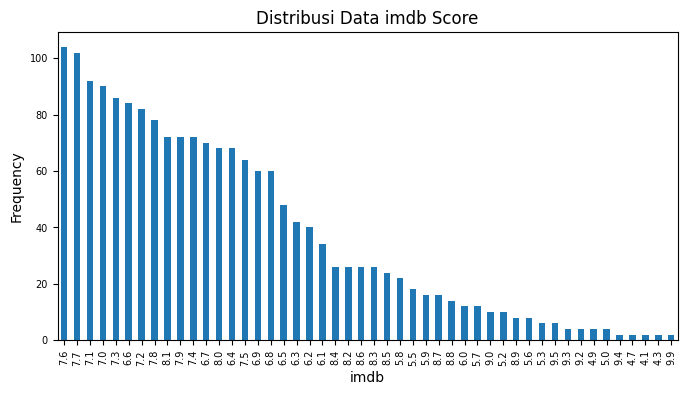

In [19]:
# Barplot Graph

plt.figure(figsize=(8,4))
df['imdb'].value_counts().plot(kind='bar', fontsize=7)
plt.title('Distribusi Data imdb Score')
plt.xlabel('imdb')
plt.ylabel('Frequency')
plt.show()

Information:
- Data distribution is skewed to the left
- Data is dominated by rating 7
- Most distribution is in rating 7.6

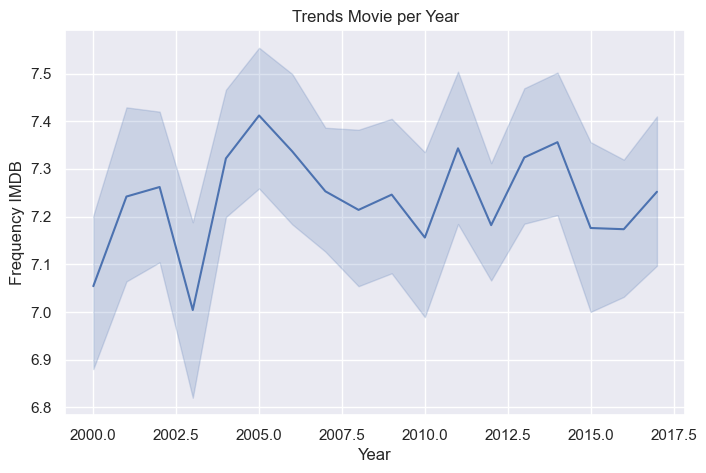

In [20]:
# Setting  tema
sns.set_theme(style='darkgrid')

# setting size image
plt.figure(figsize=(8,5))

# make a lineplot
sns.lineplot(
    data=df, 
    x='year', 
    y='imdb', 
    palette='viridis', 
    estimator='mean',  # Calculating the average if there are many values per year
    sort=True # setting for the year to be sorted
    )
plt.title('Trends Movie per Year')
plt.xlabel('Year')
plt.ylabel('Frequency IMDB')

plt.show()

Information:
- The imbd rating shows from year to year around 7.1 - 7.4.
- the rating decreased significantly in 2002
- 2005 was the peak of the highest rating which means there are films with good quality

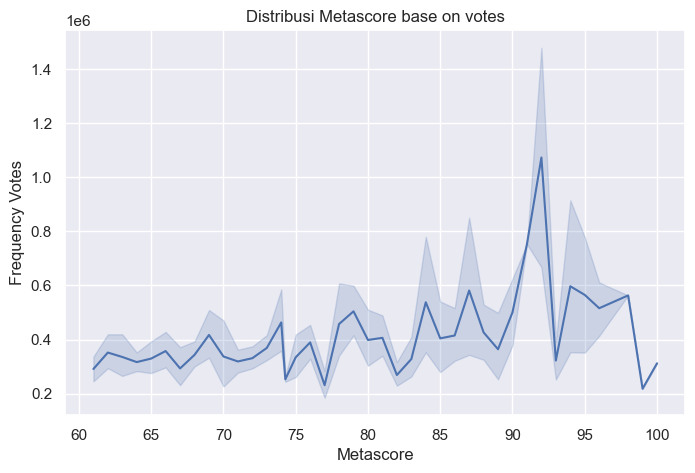

In [21]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='metascore', 
    y='votes', 
    palette='viridis', 
    estimator='mean',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Distribusi Metascore base on votes')
plt.xlabel('Metascore')
plt.ylabel('Frequency Votes')

plt.show()

Information:
- The distribution of metascore data is fairly stable but there is an increase in the 90s.
- The range of 60 - 100 in the metascore data distribution can be said to be good, meaning that film critics give a fairly good score above the average.

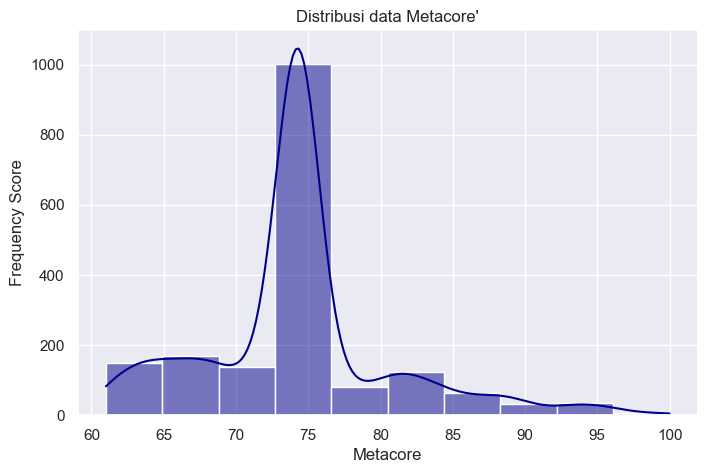

In [22]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='metascore', bins=10, kde=True, color='darkblue')
plt.title(f"Distribusi data Metacore'")
plt.xlabel('Metacore')
plt.ylabel('Frequency Score')
plt.show()

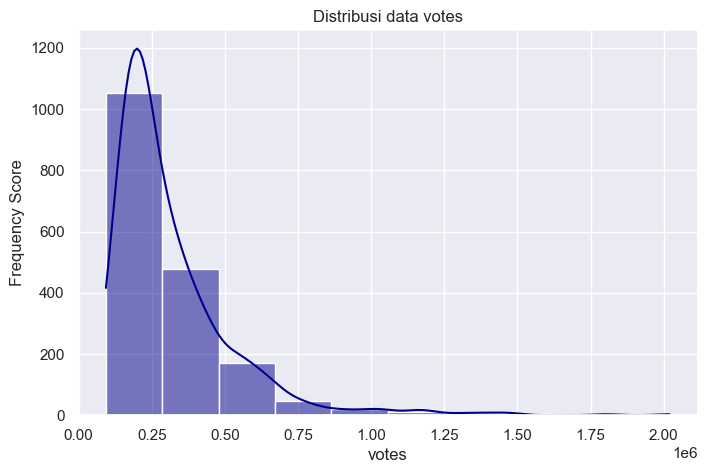

In [23]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='votes', bins=10, kde=True, color='darkblue')
plt.title(f"Distribusi data votes")
plt.xlabel('votes')
plt.ylabel('Frequency Score')
plt.show()

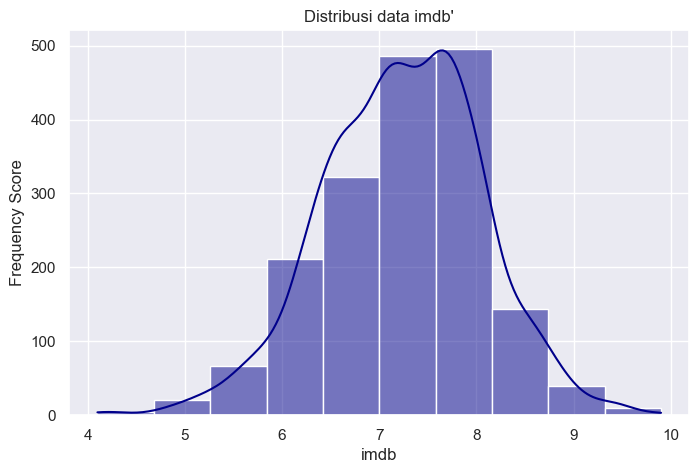

In [24]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='imdb', bins=10, kde=True, color='darkblue')
plt.title(f"Distribusi data imdb'")
plt.xlabel('imdb')
plt.ylabel('Frequency Score')
plt.show()

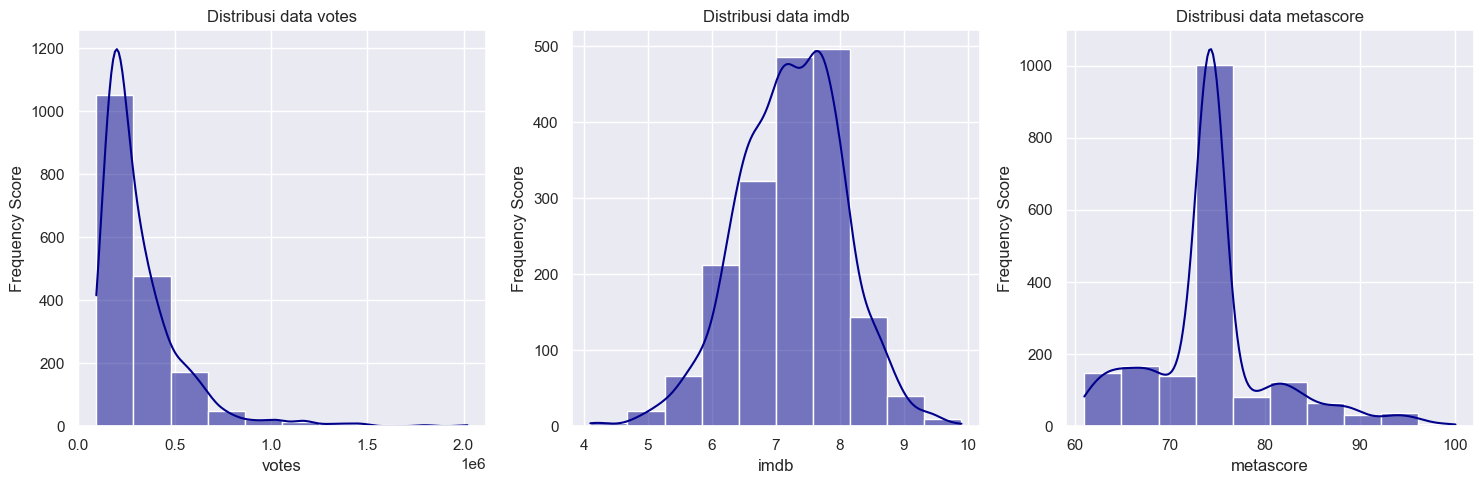

In [25]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mempersiapkan data dan parameter
columns_to_plot = ['votes', 'imdb', 'metascore']
titles = ["Distribusi data votes", "Distribusi data imdb", "Distribusi data metascore"]

# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)  # 1 baris, 3 kolom, subplot i+1
    sns.histplot(data=df, x=column, bins=10, kde=True, color='darkblue')
    plt.title(titles[i])  # Menetapkan judul dari array titles
    plt.xlabel(column)
    plt.ylabel('Frequency Score')

# Menampilkan plot
plt.tight_layout()  # Untuk memastikan tidak ada tumpang tindih antara subplot
plt.show()

Information:
- The votes data distribution is uneven and leans more to the left. While the imdb data distribution is quite good with the data more focused to the centre and the distribution of metascore data is unbalanced because there is one value that has a large number of votes.
- Imdb data with a range of 7-8 indicates that there are many films that have good quality.
- Metascore ratings with a range of 75s have a lot of data, meaning that many critics think that the film has the quality that is expected.